In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv


In [2]:
df = pd.read_csv("/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv")
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [3]:
df_cleaned = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [5]:
df.isnull().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2396.099300
std,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.439422
min,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.590000
25%,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1175.195000
50%,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.530000
75%,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3662.110000
max,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.990000


In [8]:

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day


df_cleaned[['Date', 'Year', 'Month', 'Day']].head()


,Date,Year,Month,Day
0,2020-11-22,2020,11,22
1,2021-09-23,2021,9,23
2,2022-02-10,2022,2,10
3,2021-05-17,2021,5,17
4,2021-09-22,2021,9,22


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


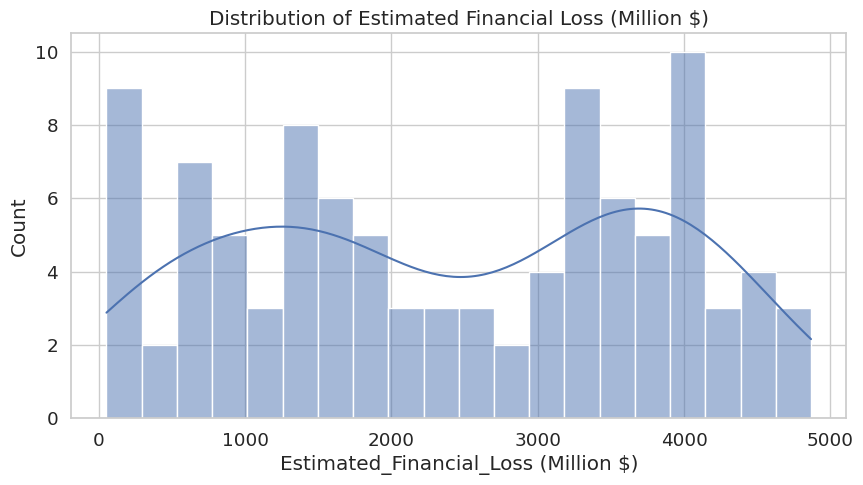

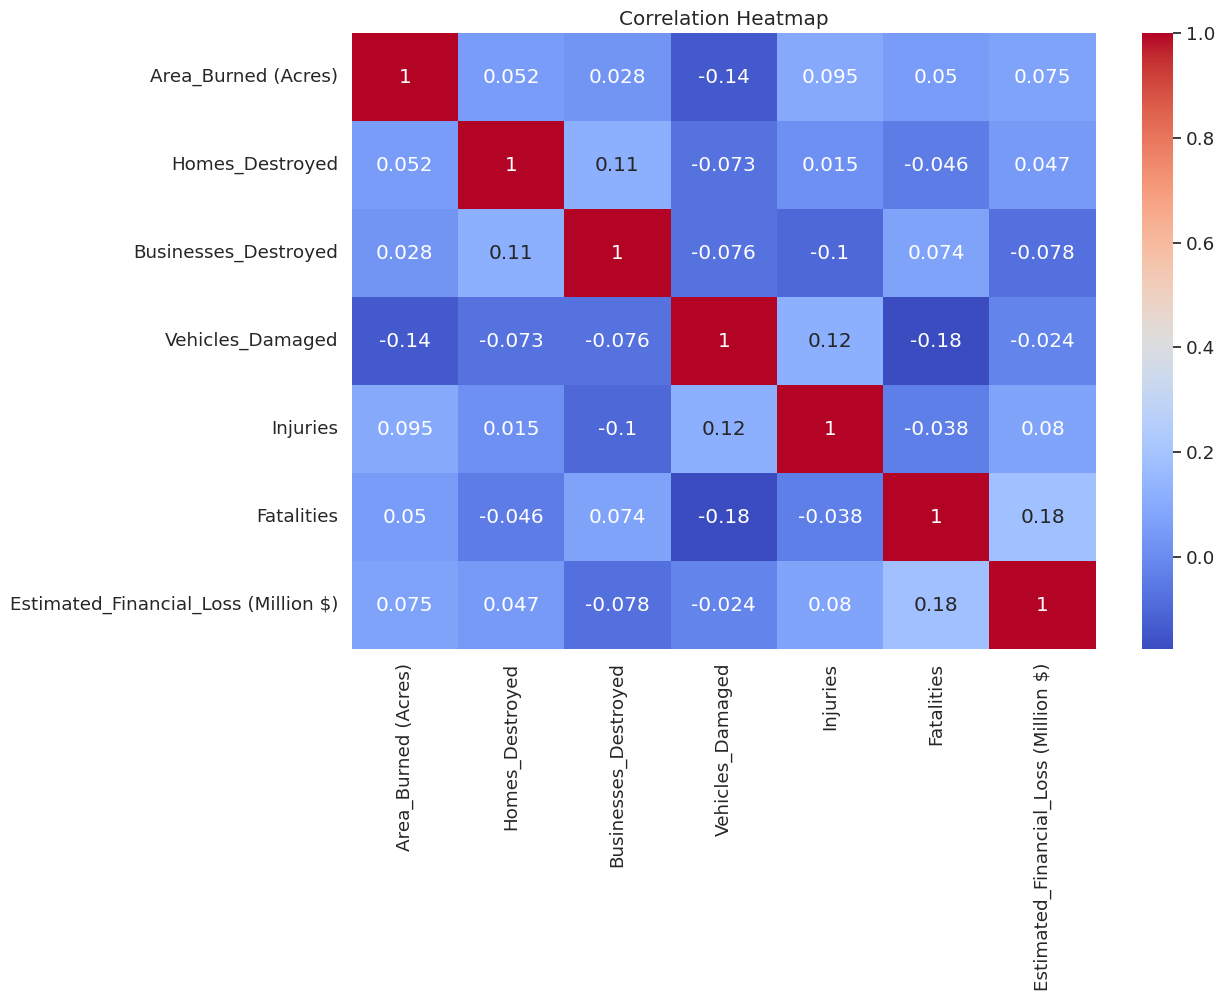

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


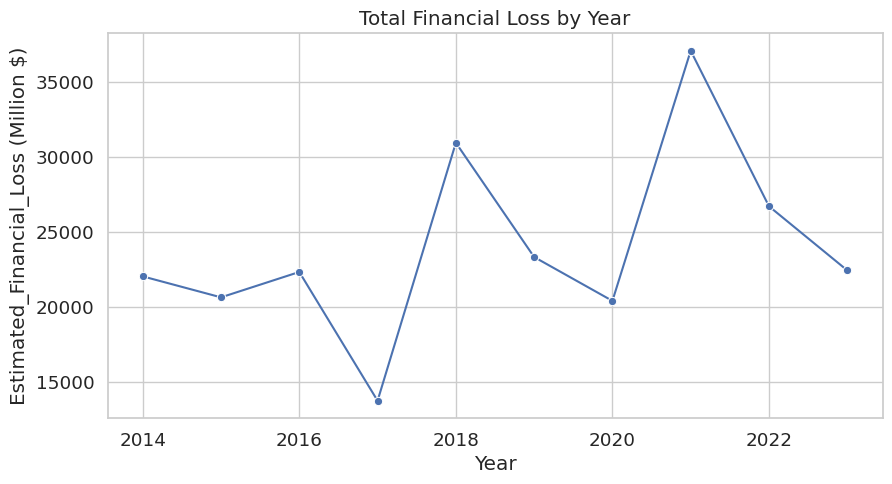

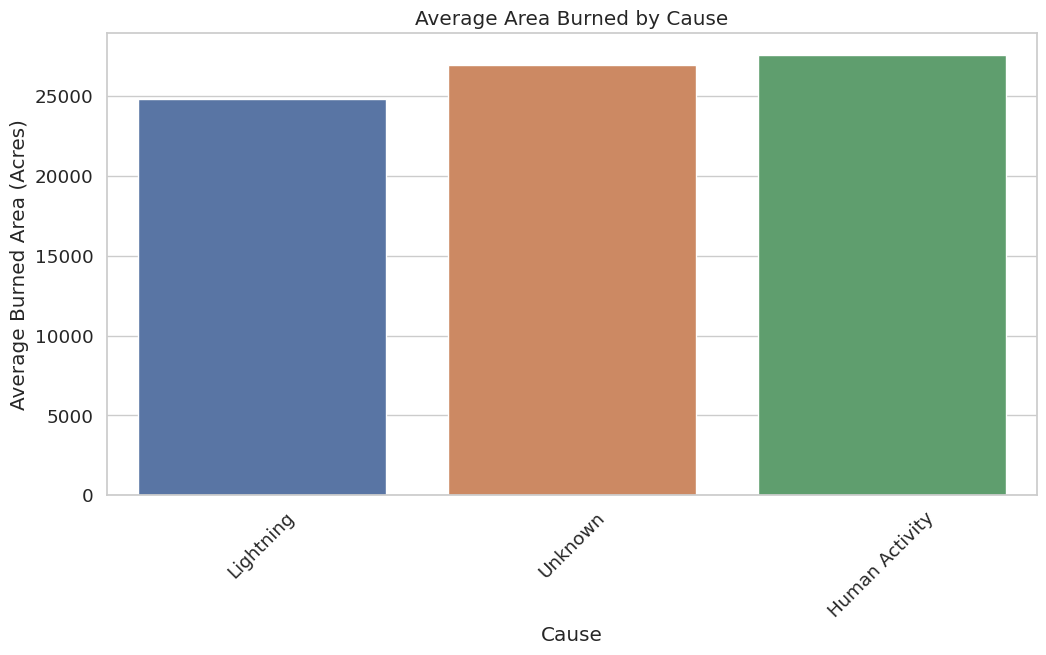

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)


plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Estimated_Financial_Loss (Million $)'], bins=20, kde=True)
plt.title("Distribution of Estimated Financial Loss (Million $)")
plt.show()


plt.figure(figsize=(12, 8))
corr = df_cleaned.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


yearly = df_cleaned.groupby('Year')['Estimated_Financial_Loss (Million $)'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='Year', y='Estimated_Financial_Loss (Million $)', marker='o')
plt.title("Total Financial Loss by Year")
plt.show()


avg_burn = df_cleaned.groupby('Cause')['Area_Burned (Acres)'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_burn.index, y=avg_burn.values)
plt.title("Average Area Burned by Cause")
plt.xticks(rotation=45)
plt.ylabel("Average Burned Area (Acres)")
plt.show()


MAE: 1299.66649
RMSE: 1604.3494217516834
R^2 Score: -0.3231445548960854


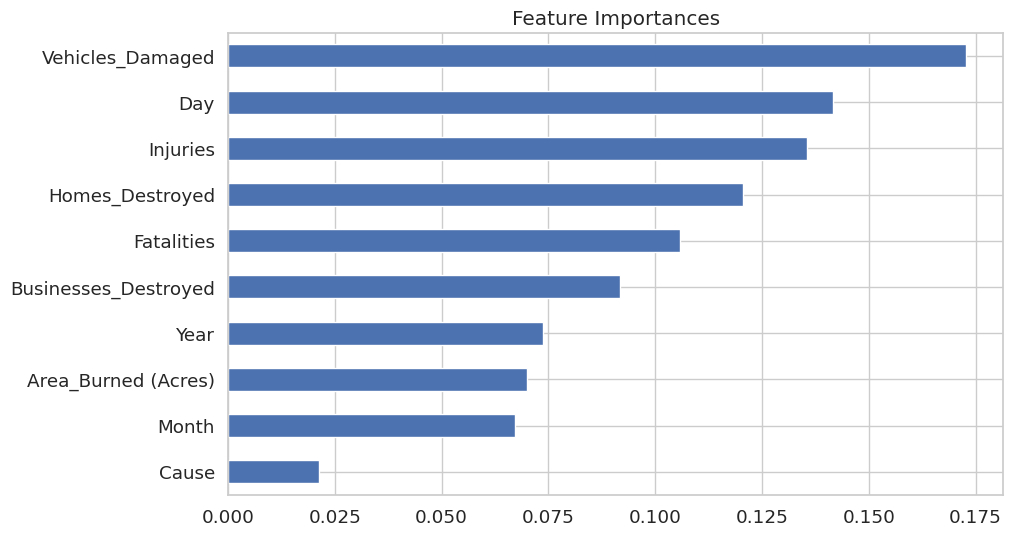

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


df_model = df_cleaned.copy()
le = LabelEncoder()
df_model['Cause'] = le.fit_transform(df_model['Cause'])


features = [
    'Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed',
    'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Year', 'Month', 'Day', 'Cause'
]
target = 'Estimated_Financial_Loss (Million $)'


X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("RMSE:", rmse)
print("R^2 Score:", r2)


importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [11]:
y = np.log1p(df_model[target])


In [12]:
X = df_model[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred_log = model.predict(X_test)


y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

In [15]:
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 1417.3685774781704
RMSE: 1622.241720514324
R² Score: -0.3528215174217675


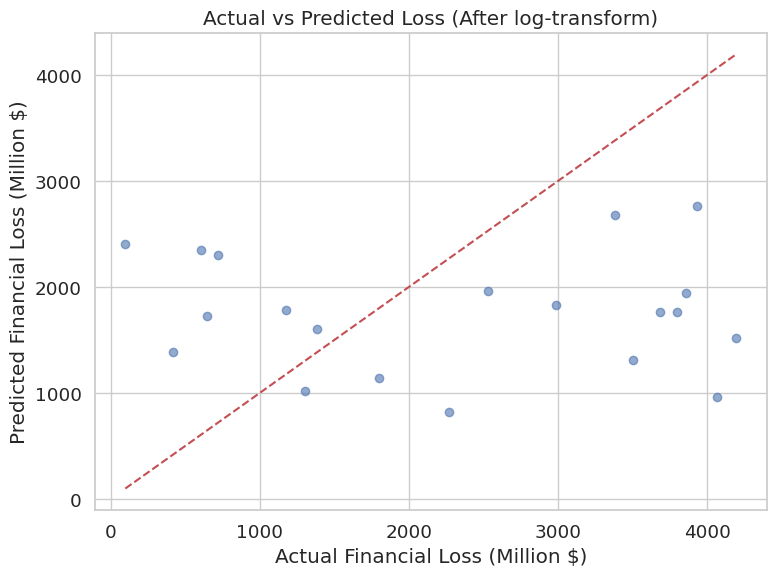

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Financial Loss (Million $)")
plt.ylabel("Predicted Financial Loss (Million $)")
plt.title("Actual vs Predicted Loss (After log-transform)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
!pip install xgboost --quiet

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [18]:
X = df_model[features]
y = np.log1p(df_model['Estimated_Financial_Loss (Million $)'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xg_reg.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=30,
    verbose=False
)


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
y_pred_log = xg_reg.predict(X_test)


y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)


mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 1324.2680275878906
RMSE: 1476.8925506585836
R² Score: -0.12126216943107226


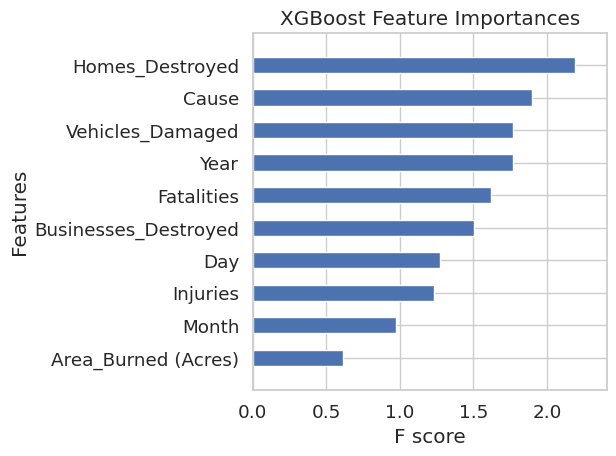

In [21]:
xgb.plot_importance(xg_reg, height=0.5, importance_type='gain', show_values=False)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()
